# EDA for Email Marketing of SMEs

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Analizando datasets

In [41]:
users = pd.read_csv('data/users.csv')
users.head(5)

,customer_id,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,likes,create_time,full_name,past_communications
0,39706,0.049630,0.004473,0.045157,1586,2023-02-04,Sophia Chen,33
1,18509,0.059322,0.004358,0.054964,3843,2023-05-05,Marco Porto,23
2,29952,0.001399,0.000058,0.001341,24000,2022-11-21,Emma Green,24
3,15304,0.469767,0.004651,0.465116,100,2023-04-30,Cristobal Tejada,26
4,38167,0.122283,0.008152,0.114130,126,2022-08-01,Altiva Viana,25


In [42]:
emails = pd.read_csv('data/email_marketing.csv')
emails.head(5)

,email_id,email_type,campaign_id,word_count,total_links,total_images,email_status,customer_id
0,EMA00081000034500,soft,13,440,8,0,0,38121
1,EMA00081000045360,aggressive,16,504,5,0,0,15603
2,EMA00081000066290,aggressive,2,962,5,0,1,16140
3,EMA00081000076560,soft,2,610,16,0,0,32350
4,EMA00081000109720,soft,15,947,4,0,0,24843


In [43]:
campaigns = pd.read_csv('data/campaigns.csv')
campaigns.head(5)

,campaign_id,marketing_budget,month
0,1,3200.57,1
1,2,3015.45,1
2,3,2202.14,2
3,4,2327.56,2
4,5,3043.77,3


In [44]:
sales = pd.read_csv('data/month_sales.csv')
sales

,month,marketing_budget,sales
0,1,6216.02,60254.95
1,2,4529.70,41627.03
2,3,9234.49,86783.56
3,4,4300.51,42006.61
4,5,8762.23,89347.68
5,6,8659.53,92575.89
6,7,7022.40,73519.98
7,8,8561.97,85168.62


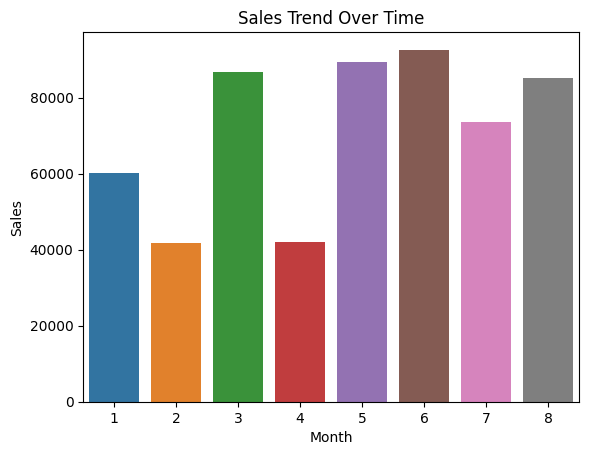

In [46]:
sns.barplot(x='month', y='sales', data=sales)
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

Here we see how much our sales have generated.

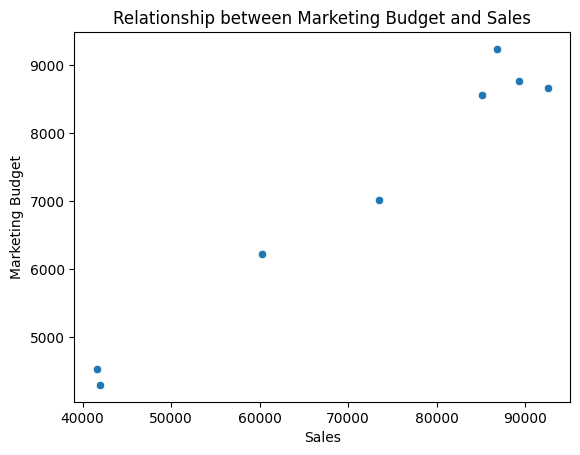

In [47]:
sns.scatterplot(x='sales', y='marketing_budget', data=sales)
plt.title('Relationship between Marketing Budget and Sales')
plt.xlabel('Sales')
plt.ylabel('Marketing Budget')
plt.show()

We see a relationship between the marketing budget and sales.

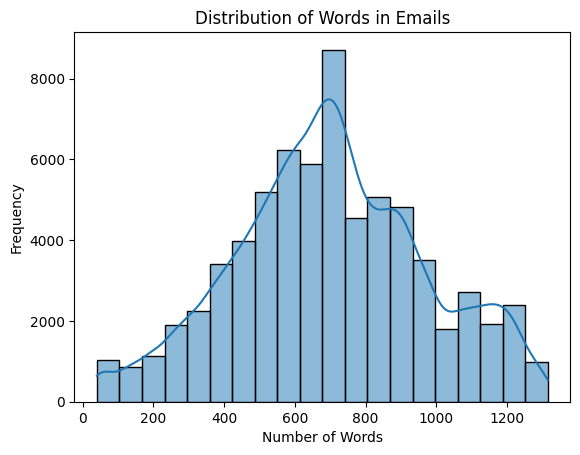

In [48]:
sns.histplot(emails['word_count'], bins=20, kde=True)
plt.title('Distribution of Words in Emails')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


Most of our emails are between 600 and 800 words.

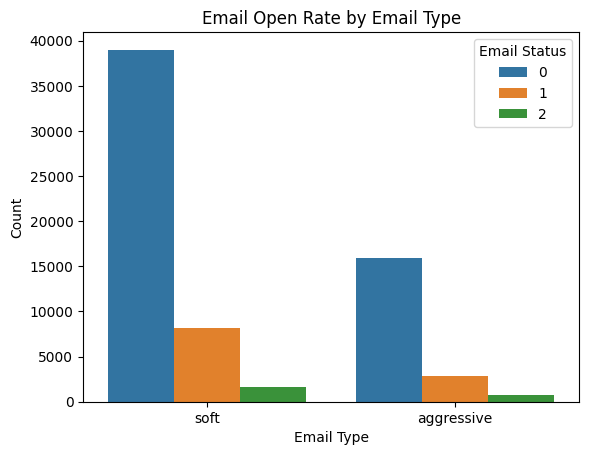

In [49]:
sns.countplot(x='email_type', hue='email_status', data=emails)
plt.title('Email Open Rate by Email Type')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.legend(title='Email Status')
plt.show()

We see that the soft email have better response than aggressive.

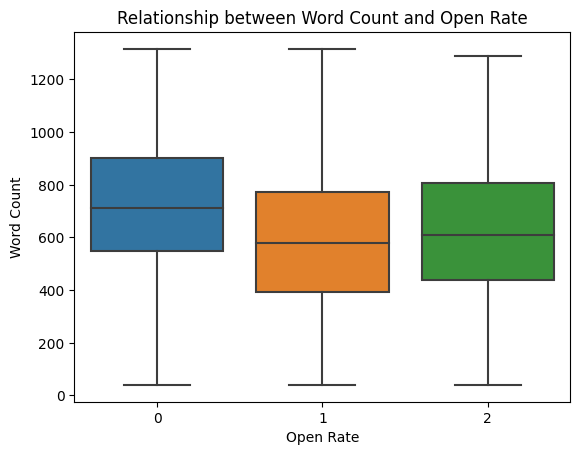

In [58]:
sns.boxplot(x='email_status',y='word_count',  data=emails)
plt.title('Relationship between Word Count and Open Rate')
plt.xlabel('Open Rate')
plt.ylabel('Word Count')
plt.show()

We can't see a relationship between Word Count and Open Rate.

### Merging the datasets to uncover more relationships

In [61]:
merged_df = users.merge(emails, on='customer_id', how='inner')
merged_df

,customer_id,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,likes,create_time,full_name,past_communications,email_id,email_type,campaign_id,word_count,total_links,total_images,email_status
0,39706,0.049630,0.004473,0.045157,1586,2023-02-04,Sophia Chen,33,EMA00081016380670,soft,1,389,5,0,0
1,39706,0.049630,0.004473,0.045157,1586,2023-02-04,Sophia Chen,33,EMA00081576993290,aggressive,20,700,11,7,0
2,39706,0.049630,0.004473,0.045157,1586,2023-02-04,Sophia Chen,33,EMA00081702155560,aggressive,12,649,16,1,0
3,39706,0.049630,0.004473,0.045157,1586,2023-02-04,Sophia Chen,33,EMA00081820023580,soft,10,440,4,0,0
4,39706,0.049630,0.004473,0.045157,1586,2023-02-04,Sophia Chen,33,EMA00082199389440,soft,19,966,21,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68348,27740,0.017046,0.000612,0.016434,182100,2022-09-12,Levin Elferink,26,EMA00085751405790,soft,12,1229,14,13,0
68349,27740,0.017046,0.000612,0.016434,182100,2022-09-12,Levin Elferink,26,EMA00086535848770,soft,9,424,9,1,0
68350,27740,0.017046,0.000612,0.016434,182100,2022-09-12,Levin Elferink,26,EMA00086588716030,aggressive,11,931,9,0,0
68351,27740,0.017046,0.000612,0.016434,182100,2022-09-12,Levin Elferink,26,EMA00086709334860,aggressive,6,314,0,4,0


In [98]:
user_email_status_avg = merged_df.groupby('customer_id')[['past_communications', 'email_status']].mean().reset_index()
user_email_status_avg['past_communications'] = user_email_status_avg['past_communications'].astype(int)
user_email_status_avg

,customer_id,past_communications,email_status
0,10011,28,0.133333
1,10020,21,0.190476
2,10025,27,0.133333
3,10030,24,0.230769
4,10037,27,0.222222
...,...,...,...
3735,39950,24,0.117647
3736,39967,21,0.380952
3737,39976,28,0.160000
3738,39977,28,0.368421


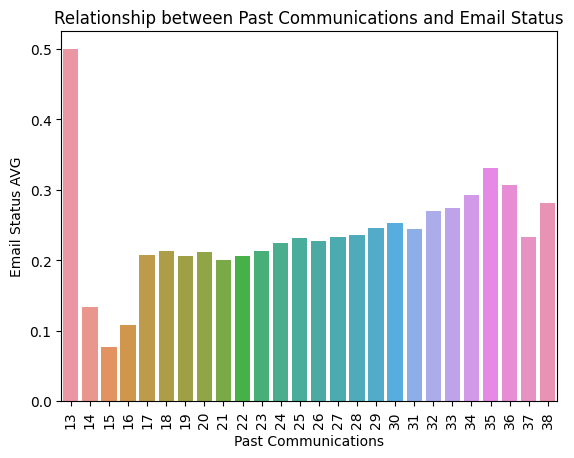

In [104]:
sns.barplot(x='past_communications', y='email_status', data=user_email_status_avg, errorbar=None)

plt.title('Relationship between Past Communications and Email Status')
plt.xlabel('Past Communications')
plt.ylabel('Email Status AVG')

plt.xticks(rotation=90)
plt.show()

We see that the first 13 emails we send are more likely to have user interaction.

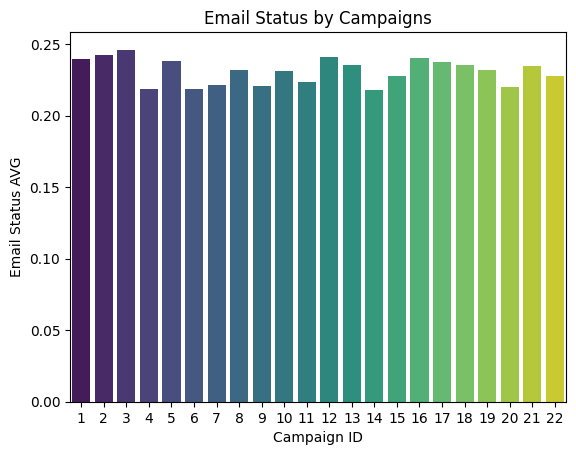

In [73]:
campaign_status_counts = emails.groupby('campaign_id')['email_status'].mean().reset_index()

sorted_campaigns = campaign_status_counts.sort_values(by='email_status', ascending=False)

sns.barplot(x='campaign_id', y='email_status', data=sorted_campaigns, palette='viridis')
plt.title('Email Status by Campaigns')
plt.xlabel('Campaign ID')
plt.ylabel('Email Status AVG')
plt.show()


Every four or five emails we get an interaction.

In [126]:
user_engage_avg = merged_df.groupby('customer_id')[['awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate', 'email_status']].mean().reset_index()
user_engage_avg

,customer_id,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,email_status
0,10011,0.048640,0.002216,0.046424,0.133333
1,10020,0.000899,0.000057,0.000842,0.190476
2,10025,0.094792,0.002416,0.092376,0.133333
3,10030,0.086510,0.000301,0.086209,0.230769
4,10037,0.156577,0.001982,0.154595,0.222222
...,...,...,...,...,...
3735,39950,0.122109,0.000150,0.121959,0.117647
3736,39967,0.002829,0.000089,0.002740,0.380952
3737,39976,0.081456,0.000467,0.080989,0.160000
3738,39977,0.043898,0.000554,0.043344,0.368421


In [127]:
def categorize_engagement(value):
    if value > 10:
        return ">10"
    elif value >= 1:
        return "1-10"
    elif value >= 0.1:
        return "0.1-1"
    elif value >= 0.01:
        return "0.01-0.1"
    elif value >= 0.001:
        return "0.001-0.01"
    else:
        return "<0.001"

user_engage_avg['awg_engagement_rate'] = user_engage_avg['awg_engagement_rate'].apply(categorize_engagement)
user_engage_avg['comment_engagement_rate'] = user_engage_avg['comment_engagement_rate'].apply(categorize_engagement)
user_engage_avg['like_engagement_rate'] = user_engage_avg['like_engagement_rate'].apply(categorize_engagement)

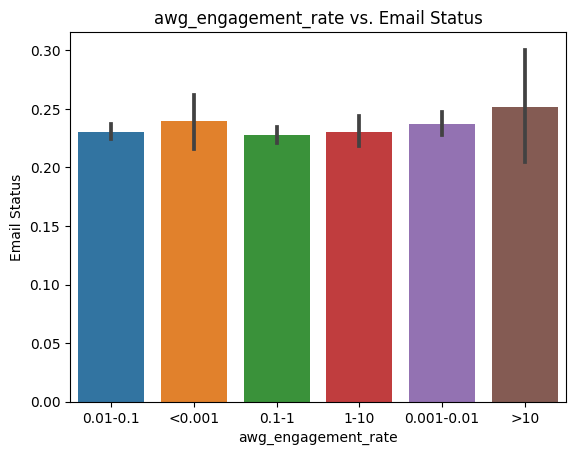

In [128]:
sns.barplot(x='awg_engagement_rate', y='email_status', data=user_engage_avg)
plt.title('awg_engagement_rate vs. Email Status')
plt.xlabel('awg_engagement_rate')
plt.ylabel('Email Status')
plt.show()

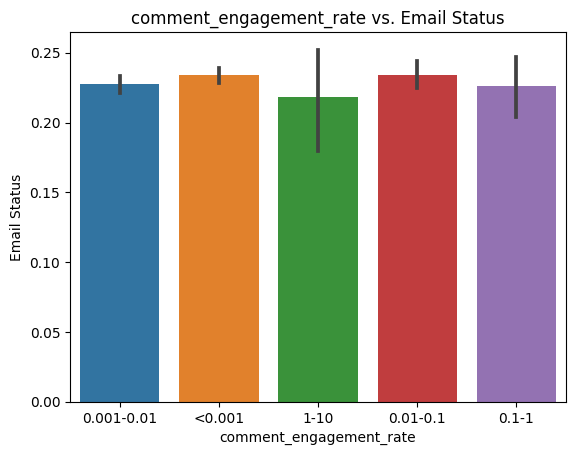

In [129]:
sns.barplot(x='comment_engagement_rate', y='email_status', data=user_engage_avg)
plt.title('comment_engagement_rate vs. Email Status')
plt.xlabel('comment_engagement_rate')
plt.ylabel('Email Status')
plt.show()

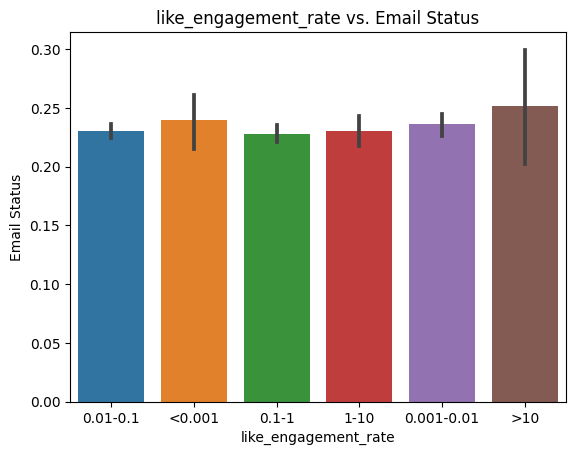

In [131]:
sns.barplot(x='like_engagement_rate', y='email_status', data=user_engage_avg)
plt.title('like_engagement_rate vs. Email Status')
plt.xlabel('like_engagement_rate')
plt.ylabel('Email Status')
plt.show()

We can see that there is no relationship between user interactions and our emails.